# Objective of Client
    -Identify best sectors,coutries and investment type for making investment 

# Constrains
    - 5 to 15 mn USD per round
    - Invest only in english speaking contries

# Strategies
    -Invest where other investors are investing
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline


In [2]:
#Get the data first
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')
print("rounds2:",rounds2.shape)

companies = pd.read_table('companies.txt',encoding = 'ISO-8859-1')
print("companies:",companies.shape)
  
mappings = pd.read_csv('mapping.csv')
print("mappings:",mappings.shape) 

rounds2: (114949, 6)
companies: (66368, 10)
mappings: (688, 10)


# General data analysis

In [3]:
rounds2.columns,companies.columns,mappings.columns

(Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
        'funding_round_code', 'funded_at', 'raised_amount_usd'],
       dtype='object'),
 Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
        'country_code', 'state_code', 'region', 'city', 'founded_at'],
       dtype='object'),
 Index(['category_list', 'Automotive & Sports', 'Blanks',
        'Cleantech / Semiconductors', 'Entertainment', 'Health',
        'Manufacturing', 'News, Search and Messaging', 'Others',
        'Social, Finance, Analytics, Advertising'],
       dtype='object'))

In [4]:
print(companies.isnull().sum())
companies.describe(include=['O'])

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Tm3-Systems,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


    -We can see that permalink has no any null value and all the
      values are unique, so we can take it as a primary key
     Also
    -we have so many null values in our dataset
    -however as per requirement we need raised amount
    -we will remove null categorylist afterwords
    -we are going to remove all the non english countries
        

In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


    -What we can see from the data that permalink and company_parmalink is relation between two dataframe
    -but as from data we see that links are not comparable becoz of uper and lower case ,
    -first convert all to lower case
        

In [3]:
companies['permalink']=companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [4]:
print("Countries which are not present in companies are as below:")
test=companies.permalink
rounds2.query("company_permalink not in @test")

Countries which are not present in companies are as below:


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


    -There are 7 rows in rounds2 dataframe which has company permalink 
      which is not in companies dataframe (this couldbe due to different language character)
    -Merge the two dataframes -rounds2 and companies

In [5]:
master_frame= rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner') 

In [6]:
master_frame.shape,master_frame.columns

((114942, 16),
 Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
        'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
        'name', 'homepage_url', 'category_list', 'status', 'country_code',
        'state_code', 'region', 'city', 'founded_at'],
       dtype='object'))

    -As per requirement we need to consider only countries so we will remove all other columns regarding location

In [7]:
master_frame.drop(['state_code', 'region', 'city'],axis=1,inplace=True)

    -We also do not need funding_round_permalink,funding_round_code,funded_at,name,homepage_url

In [8]:
master_frame.drop(['funding_round_permalink','funding_round_code', 'funded_at','name','homepage_url'\
                    ],axis=1,inplace=True)

In [9]:
print("Value counts",master_frame['company_permalink'].isin(companies['permalink']).value_counts(),"\n")


Value counts True    114942
Name: company_permalink, dtype: int64 



In [12]:
print("Note that the data is after we perform lower case")
print("----------------------------------------------------------")
print("In Rounds2",rounds2.apply(lambda x: len(x.unique())))
print("----------------------------------------------------------")
print("In comapnies",companies.apply(lambda x: len(x.unique())))

Note that the data is after we perform lower case
----------------------------------------------------------
In Rounds2 company_permalink           66370
funding_round_permalink    114949
funding_round_type             14
funding_round_code              9
funded_at                    5033
raised_amount_usd           22096
dtype: int64
----------------------------------------------------------
In comapnies permalink        66368
name             66103
homepage_url     61192
category_list    27297
status               4
country_code       138
state_code         312
region            1093
city              5112
founded_at        3979
dtype: int64


# Country analysis

    -Now we will remove all non emglish speaking contries
    -From the data provided -        'IND','USA','CAN','GBR','AUS','SGP','IRL','NZL','CHE','NGA','ZAF','MUS','KEN','PHL','GHA','UGA','PAK','ZWE','BRB','TTO','CMR','MLT','ZMB','JAM','KNA','RWA','DMA','BLZ','GRD','SYC'
    These are the coutries which speaks english

In [9]:
eng_countries=['IND','USA','CAN','GBR','AUS','SGP','IRL','NZL','CHE','NGA','ZAF','MUS','KEN','PHL','GHA','UGA','PAK','ZWE','BRB','TTO','CMR','MLT','ZMB','JAM','KNA','RWA','DMA','BLZ','GRD','SYC']
master_frame=master_frame[master_frame['country_code'].isin(eng_countries)]
master_frame.shape

(87002, 8)

In [10]:
#As mentioned earlier we will impute raised aamount with the help of country and round type
table = master_frame.pivot_table(values='raised_amount_usd', index='country_code' ,columns='funding_round_type', aggfunc=np.mean)
def fillInvest(x):
    return table.loc[x['country_code'],x['funding_round_type']]
# Replace missing values
master_frame['raised_amount_usd'].fillna(master_frame[master_frame['raised_amount_usd'].isnull()].apply(fillInvest,axis=1),inplace=True)

<Container object of 30 artists>

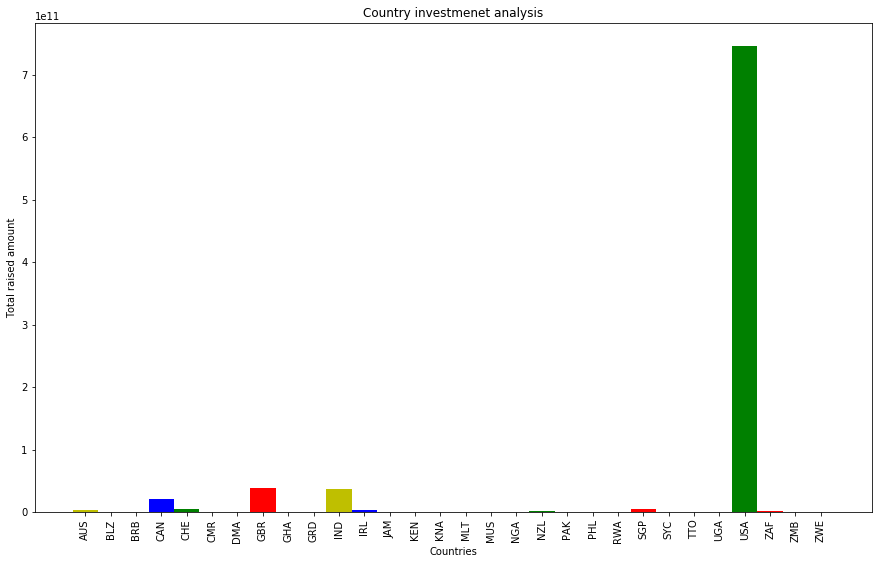

In [36]:
countryInvestments=pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending =True))
 
plt.figure(figsize=(15,9))
plt.title("Country investmenet analysis") 
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Total raised amount")
plt.bar(countryInvestments.index, countryInvestments.raised_amount_usd, edgecolor='white', width=1,color="RGBY")

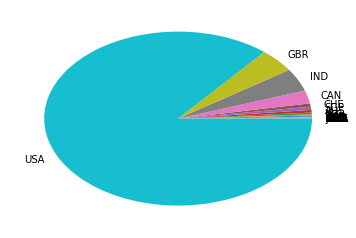

In [16]:
plt.pie(data=countryInvestments,labels=countryInvestments.index,x=countryInvestments.raised_amount_usd,radius=5)
plt.xticks(rotation=180)
plt.show()

    --What we can see from the visuals that most part of investment is done by USA following it is GBR and IND
    --There is a huge difference of amount in USA and all othe coutries
    --We will consider top 10 countries with highest investment for our investigation.

In [40]:
master_frame=master_frame[master_frame['country_code'].isin(countryInvestments.tail(10).index)]
master_frame.shape

(86668, 8)

# Funding round type analysis

In [42]:
#As per the requirement client wants type from only 4 -seed angel venture private equity
#we remove all except them
rounds=['angel','seed','venture','private_equity']
master_frame= master_frame[master_frame['funding_round_type'].isin(rounds)]
master_frame.shape

(70078, 8)

   --We reduced data from 86k data to 70k data after removing funding types which are not necessary.

In [43]:
funding=pd.DataFrame(master_frame.groupby('funding_round_type').raised_amount_usd.sum().sort_values(ascending=True))
funding=funding.reset_index() 
funding

,funding_round_type,raised_amount_usd
0,angel,3.330879e+09
1,seed,1.652551e+10
2,private_equity,1.069869e+11
3,venture,5.103796e+11


Text(0.5,1,'Rounding fund type analysis')

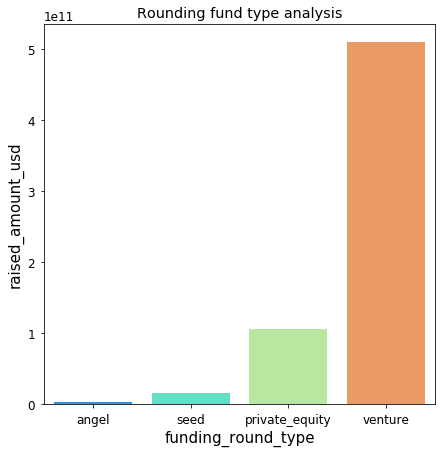

In [45]:
  
plt.figure(figsize=(7,7))   
sns.set_context("paper", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})
ax=sns.barplot(data=funding,x=funding.funding_round_type,y=funding.raised_amount_usd,palette='rainbow')
plt.title('Rounding fund type analysis')

    -What we can see from the plot is - investment is highest in venture round in english speaking countries

Text(0.5,1,'Country and rounding type analysis')

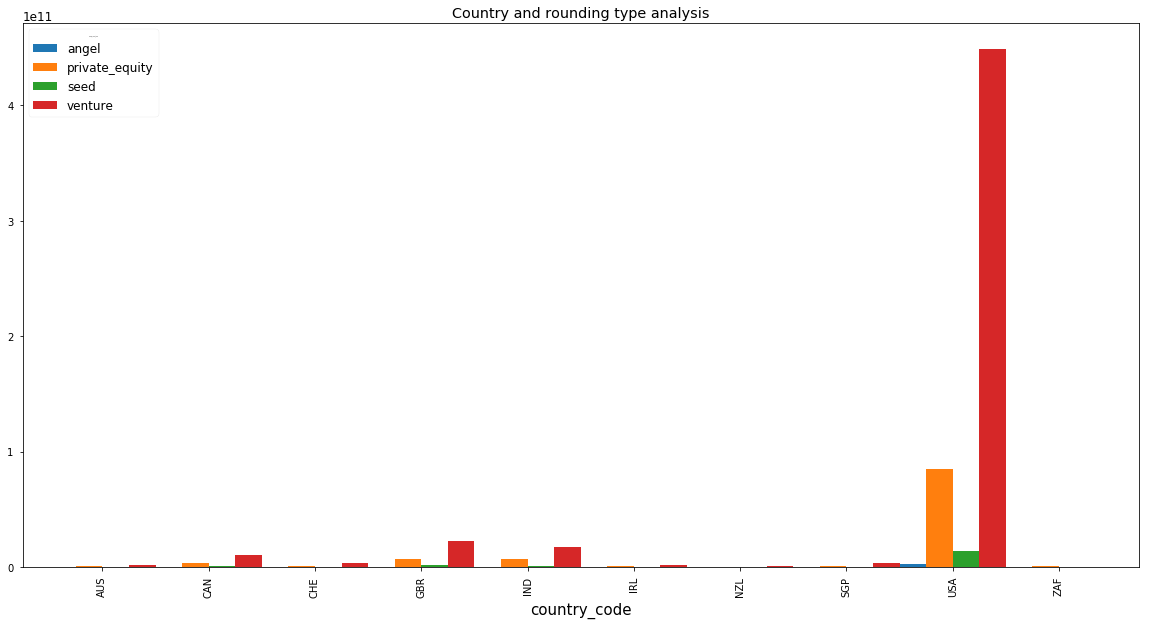

In [50]:
 
plotCountryFund = master_frame.pivot_table(values='raised_amount_usd', index='country_code' ,columns='funding_round_type', aggfunc=np.sum)
 
plotCountryFund.plot(figsize=(20,10),kind='bar',fontsize=10,width=1)
plt.title('Country and rounding type analysis') 

    --We can see that USA,IND and GBR are more involved in private equity and venture type of investment
    --We have a constraint of investing 5 to 15billions of amount 
    --for that lets  take mean of all the four options

In [51]:
d=pd.DataFrame(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean())
d=pd.DataFrame(d.raised_amount_usd.apply(lambda x: '%.2f'%x))
d

,raised_amount_usd
funding_round_type,
angel,854071.66
private_equity,62093388.60
seed,815028.04
venture,11552537.78


    --As per our criteria the amount invested must fall into 5 to 15 bn,
      so 'venture' is the one that we will consider for investment 
    --From previous graph - USA,GBR,IND,CAN,CHE,SGP invests most in venture as comapred to other countries
      ,so we will reduce dataset to this 4 countries

In [52]:
master_frame=master_frame[master_frame['country_code'].isin(['USA','GBR','IND','CAN','CHE',"SGP"])]
master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame.shape

(43595, 8)

    -- we reduced from 70k to 43k data

# Sector analysis
    --we do not have direct mappimg for sectors
    --we do have one hot encoded file for the same, so we will do reverse one hot enconding of given file
    --We have some null data in categories, it is not useful to keep null data, we will remove it

In [53]:

master_frame = master_frame.drop(master_frame[master_frame['category_list'].isnull()].index)

In [54]:
def get_sector(row):
     for c in mappings.columns:
            if row[c]==1:
                return c

mappings['sector']=mappings.apply(get_sector, axis=1)
modified_mappings=mappings[['category_list','sector']]

 

In [55]:
def part(x):
    #print(x)
    p=[]
    parts = x.split('|')
    for y in parts:
        p.extend(modified_mappings.loc[modified_mappings['category_list']==y]['sector'])
        break
    k=','.join(str(s) for s in set(p))   
    return k
#master_frame .loc[master_frame['category_list']==nan]   
master_frame['list']=master_frame['category_list'].apply(part)

In [397]:
master_frame.loc[:,['country_code','raised_amount_usd','list']].head(5)

,country_code,raised_amount_usd,list
0,IND,1.000000e+07,Entertainment
1,USA,1.168706e+07,"News, Search and Messaging"
5,USA,1.168706e+07,Others
8,CAN,7.194910e+05,Cleantech / Semiconductors
10,USA,2.000000e+07,"Social, Finance, Analytics, Advertising"


       -Check sector per occurence - max number of occrence of sector in countries

Text(0,0.5,'Count of investment')

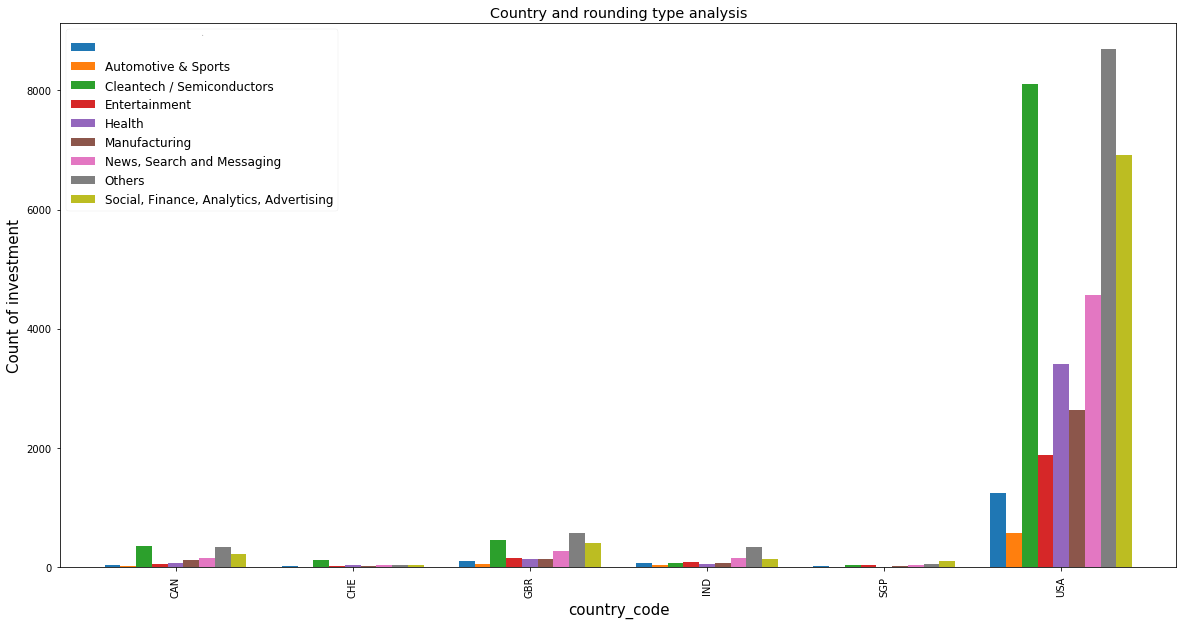

In [67]:
 
plotsector = master_frame.pivot_table(values='raised_amount_usd', index='country_code' ,columns='list', aggfunc=np.count_nonzero)
  
plotsector.plot(figsize=(20,10),kind='bar',fontsize=10,width=0.8)
plt.title('Country and rounding type analysis') 
plt.ylabel('Count of investment')

    --Notable Observations
        1)USA - Sectors Others,Cleantech/Semiconductors,Social/Finance/Analytics/Advertising 
                are the most occured investment 
        2)GBR - Sectors Others,Cleantech/Semiconductors,Social/Analytics/Advertising 
                are the most occured investmenets
        3)IND - Sectors Others and News seems to top the chart for India
        4)CAN - Cleantech/Semiconductor and Others are more occured  

    -Let us do it by total summation of investment

Text(0,0.5,'Total investment')

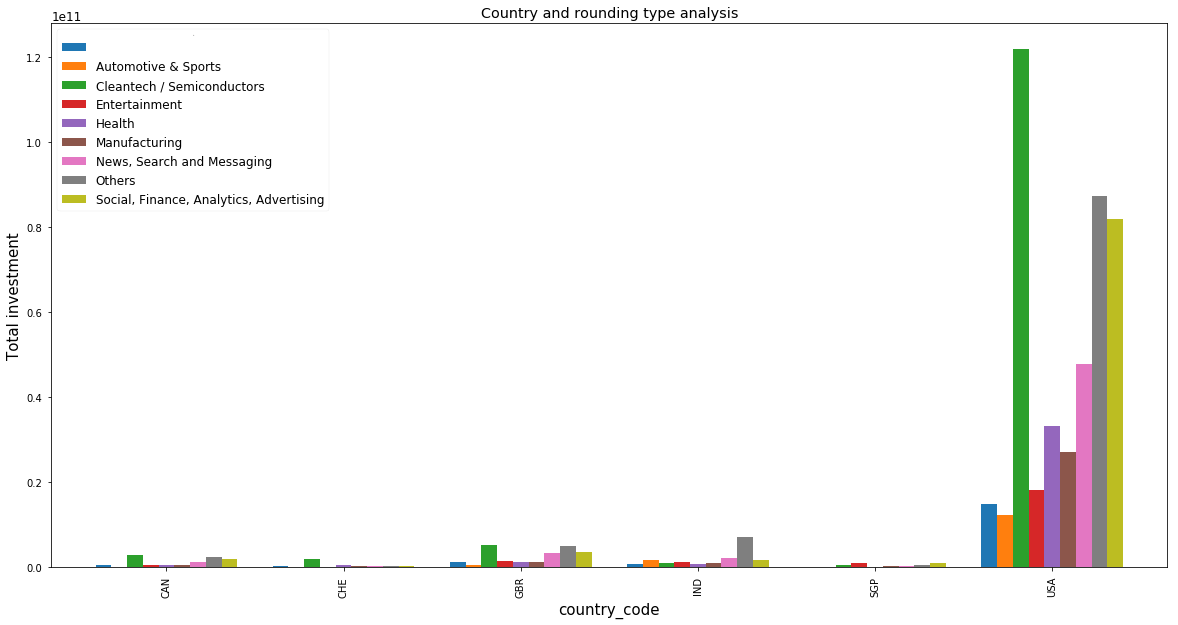

In [68]:
plotsectorAddition = master_frame.pivot_table(values='raised_amount_usd', index='country_code' ,columns='list', aggfunc=np.sum)
  
plotsectorAddition.plot(figsize=(20,10),kind='bar',fontsize=10,width=0.8)
plt.title('Country and rounding type analysis') 
plt.ylabel('Total investment')

    --Notable Observations
        1)USA - Sectors Cleantech/Semiconductors,Others,Social/Finance/Analytics/Advertising 
                are the most investmented sectors
        2)GBR - Sectors Others,Cleantech/Semiconductors,Social/Analytics/Advertising 
                are the most invested sectors
        3)IND - Sectors Others is most invested in India
        4)CAN - Cleantech/Semiconductor and Others are most invested  